In [ ]:

!pip3 install ipython-autotime
!pip3 install pickle5
# !pip3 install --upgrade nltk
%load_ext autotime

import pandas as pd
import numpy as np
nb_workers=10

my_dir = '...'
data_path = '...'

import os
from datetime import datetime
import pickle5

import os

# !pip3 install umap-learn

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 KB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp38-cp38-linux_x86_64.whl size=236289 sha256=5c9c77e360770b312c8a1c2d9896eabc6576912fc06ce1b4e725d4af6b6a6324
  Stored in directory: /root/.cache/pip/wheels/25/d4/61/dbd8edd1a0d656be7b4267c85db3b61951eb60016a0154a122
Successfully built pickle5
time: 2.5 s (started: 2023-01-14 13:46:04 +00:00)


## Validation on Congresspeople

In [ ]:
# data_users_df=pd.read_pickle('/content/drive/Shareddrives/Echo Chamber Project 2022/Datasets/Congress Tweets Labels/complete_members_sen_cong.pickle')
data_users_df = pd.read_hdf('/content/drive/Shareddrives/Echo Chamber Project 2022/Datasets/congresspeople_list.hdf')
data_users_df=data_users_df[data_users_df['average_embedding'].map(len)>2]
data_users_df=data_users_df[data_users_df['party']!='I']

time: 2.29 s (started: 2022-07-06 12:39:19 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_users_df['average_embedding'], data_users_df['party'],test_size=0.5, random_state=1)
# clf = LogisticRegression()
clf = svm.LinearSVC()
clf.fit(list(X_train), y_train)
pred = clf.predict(list(X_test))
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           D       0.95      0.91      0.93       133
           R       0.92      0.96      0.94       136

    accuracy                           0.93       269
   macro avg       0.93      0.93      0.93       269
weighted avg       0.93      0.93      0.93       269

time: 71.9 ms (started: 2022-07-06 12:40:30 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_users_df['average_embedding'], data_users_df['party'],test_size=0.3, random_state=1)

import umap.umap_ as umap
manifold = umap.UMAP(n_components=100,
                  n_neighbors = 15,    
                  metric='cosine', verbose=True, 
                  random_state=1).fit(list(X_train))
X_train = manifold.transform(list(X_train))
X_test = manifold.transform(list(X_test))

clf = LogisticRegression()
clf = svm.LinearSVC()
clf.fit(list(X_train), y_train)
pred = clf.predict(list(X_test))
print(classification_report(y_test, pred))

UMAP(angular_rp_forest=True, metric='cosine', n_components=100, random_state=1, verbose=True)
Wed Jun 29 10:27:34 2022 Construct fuzzy simplicial set
Wed Jun 29 10:27:34 2022 Finding Nearest Neighbors
Wed Jun 29 10:27:34 2022 Finished Nearest Neighbor Search
Wed Jun 29 10:27:34 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Jun 29 10:27:38 2022 Finished embedding


Epochs completed:   0%|            0/100 [00:00]

              precision    recall  f1-score   support

           D       0.82      0.94      0.87        81
           R       0.92      0.78      0.85        77

    accuracy                           0.86       158
   macro avg       0.87      0.86      0.86       158
weighted avg       0.87      0.86      0.86       158

time: 10.9 s (started: 2022-06-29 10:27:34 +00:00)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


## Pairwise Separability for Hashtag Users

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 23.8 s (started: 2023-01-14 13:47:33 +00:00)


In [ ]:
from pandas.core.common import random_state
user_list_df = pd.read_hdf('/content/drive/Shareddrives/Echo Chamber Project 2022/Datasets/User_lists/hashtag_users_list.hdf')
user_list_df_=user_list_df[user_list_df['average_embedding'].map(len)>2]

user_list_df__=user_list_df_[user_list_df_['hashtag']!='Anti-Abortion'].groupby('hashtag', group_keys=False).apply(lambda x: x.sample(1500,random_state=1))
user_list_df_=pd.concat([user_list_df__,user_list_df_[user_list_df_['hashtag']=='Anti-Abortion']])

user_list_df_['hashtag'].value_counts()

Anti-Gun            1500
Pro-Abortion        1500
Pro-Gun             1500
StandWithUkraine    1500
Anti-Abortion        729
Name: hashtag, dtype: int64

time: 5.47 s (started: 2022-08-05 11:13:34 +00:00)


In [ ]:
user_list_df[user_list_df['average_embedding'].map(len)>2]['hashtag'].value_counts()

Anti-Gun            5089
Pro-Abortion        3793
StandWithUkraine    2989
Pro-Gun             1909
Anti-Abortion        729
Name: hashtag, dtype: int64

time: 24.9 ms (started: 2022-07-04 16:09:33 +00:00)


In [ ]:
from itertools import combinations

all_pairs = list(combinations(set(user_list_df_['hashtag']), 2))
all_pairs

[('Pro-Gun', 'StandWithUkraine'),
 ('Pro-Gun', 'Pro-Abortion'),
 ('Pro-Gun', 'Anti-Abortion'),
 ('Pro-Gun', 'Anti-Gun'),
 ('StandWithUkraine', 'Pro-Abortion'),
 ('StandWithUkraine', 'Anti-Abortion'),
 ('StandWithUkraine', 'Anti-Gun'),
 ('Pro-Abortion', 'Anti-Abortion'),
 ('Pro-Abortion', 'Anti-Gun'),
 ('Anti-Abortion', 'Anti-Gun')]

time: 7.3 ms (started: 2022-08-05 11:13:49 +00:00)


In [ ]:
for x,y in all_pairs:
  user_list_df_x = user_list_df_[(user_list_df_['hashtag']==x) | (user_list_df_['hashtag']==y)]
  user_list_df_x = user_list_df_x.drop_duplicates('user_id')
  X_train, X_test, y_train, y_test = train_test_split(user_list_df_x['average_embedding'], user_list_df_x['hashtag'],test_size=0.5, random_state=1)
  # clf = LogisticRegression()
  clf = svm.LinearSVC()
  clf.fit(list(X_train), y_train)
  pred = clf.predict(list(X_test))
  f_x = f1_score(y_test, pred, average='macro')
  print(f'{x} vs {y}   f1_score = {f_x}')

Pro-Gun vs StandWithUkraine   f1_score = 0.8265101902004566
Pro-Gun vs Pro-Abortion   f1_score = 0.77484291101214
Pro-Gun vs Anti-Abortion   f1_score = 0.6037429532161925
Pro-Gun vs Anti-Gun   f1_score = 0.8203553660270078
StandWithUkraine vs Pro-Abortion   f1_score = 0.738606853493577
StandWithUkraine vs Anti-Abortion   f1_score = 0.8982568896312568
StandWithUkraine vs Anti-Gun   f1_score = 0.7661896533102928
Pro-Abortion vs Anti-Abortion   f1_score = 0.8676042598626508
Pro-Abortion vs Anti-Gun   f1_score = 0.6964970471644689
Anti-Abortion vs Anti-Gun   f1_score = 0.9111616244463713
time: 1.74 s (started: 2022-08-05 11:14:22 +00:00)


## Pairwise Separability for Network Users

In [ ]:
# topic = 'abortion'
# topic = 'gun'
topic = 'ukraine'


from pandas.core.common import random_state
# user_list_df = pd.read_hdf('/content/drive/Shareddrives/Echo Chamber Project 2022/Datasets/User_lists/network_users_list.hdf')
user_list_df = pd.read_hdf(f'/content/drive/Shareddrives/Echo Chamber Project 2022/Output/new gun and abortion datasets/echo_chambers_in_{topic}_dataset.hdf')
user_list_df_=user_list_df[user_list_df['average_embedding'].map(len)>2]
# user_list_df_=user_list_df_[user_list_df_['average_embedding_NoRT'].map(len)>2]

user_list_df_=user_list_df_.groupby(topic, group_keys=False).apply(lambda x: x.sample(1500,random_state=1))
# user_list_df_=user_list_df_.groupby(topic, group_keys=False).apply(lambda x: x.sample(900,random_state=1))

user_list_df_[topic].value_counts()

0    1500
1    1500
Name: ukraine, dtype: int64

time: 3.47 s (started: 2023-01-14 13:48:00 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(user_list_df_['average_embedding'], user_list_df_[topic],test_size=0.5, random_state=1)
# clf = LogisticRegression()
clf = svm.LinearSVC()
# clf = svm.SVC()


clf.fit(list(X_train), y_train)
pred = clf.predict(list(X_test))
f_x = f1_score(y_test, pred, average='macro')
print(f'0 vs 1   f1_score = {f_x}')

0 vs 1   f1_score = 0.920663810563847
time: 156 ms (started: 2022-08-02 12:18:26 +00:00)


## Chamber-Wise Separability

In [ ]:
topics = ['abortion','gun','ukraine']

from itertools import combinations

all_pairs = list(combinations(topics, 2))

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

time: 1.61 ms (started: 2022-08-02 17:31:55 +00:00)


In [ ]:
for topic_a, topic_b in all_pairs:
  user_list_df_a = pd.read_hdf(f'/content/drive/Shareddrives/Echo Chamber Project 2022/Output/new gun and abortion datasets/echo_chambers_in_{topic_a}_dataset.hdf')
  user_list_df_a=user_list_df_a[user_list_df_a['average_embedding'].map(len)>2]
  user_list_df_a=user_list_df_a.groupby(topic_a, group_keys=False).apply(lambda x: x.sample(1500,random_state=2))
  user_list_df_b = pd.read_hdf(f'/content/drive/Shareddrives/Echo Chamber Project 2022/Output/new gun and abortion datasets/echo_chambers_in_{topic_b}_dataset.hdf')
  user_list_df_b=user_list_df_b[user_list_df_b['average_embedding'].map(len)>2]
  user_list_df_b=user_list_df_b.groupby(topic_b, group_keys=False).apply(lambda x: x.sample(1500,random_state=2))

  for x,y in [(0, 0), (1, 1), (0, 1), (1, 0)]:
    user_list_df_a_ = user_list_df_a[user_list_df_a[topic_a]==x]#.rename({topic_a:'chamber'},axis=1)
    user_list_df_a_['chamber']=0
    user_list_df_b_ = user_list_df_b[user_list_df_b[topic_b]==y]#.rename({topic_b:'chamber'},axis=1)
    user_list_df_b_['chamber']=1
    user_list_df_x = pd.concat([user_list_df_a_,user_list_df_b_])
    X_train, X_test, y_train, y_test = train_test_split(user_list_df_x['average_embedding'], user_list_df_x['chamber'],test_size=0.5, random_state=1)
    # clf = LogisticRegression()
    clf = svm.LinearSVC()
    clf.fit(list(X_train), y_train)
    pred = clf.predict(list(X_test))
    f_x = f1_score(y_test, pred, average='macro')
    # clf.fit(list(user_list_df_x['average_embedding']), user_list_df_x['chamber'])
    # pred = clf.predict(list(user_list_df_x['average_embedding']))
    # f_x = f1_score(user_list_df_x['chamber'], pred, average='macro')
    print(f'{topic_a}{x} vs {topic_b}{y}   f1_score = {f_x}')

# Variance Calculation

In [ ]:
# graph_colors_dict = {1:'blue',0:'red'}
# name_dict = {1:'Chamber A',0:'Chamber B'}

graph_colors_dict = {0:'blue',1:'red'}
name_dict = {0:'Chamber A',1:'Chamber B'}
graph_colors_dict = {'StandWithUkraine':'yellow','Pro-Gun':'red','Anti-Gun':'blue','Pro-Abortion':'deepskyblue','Anti-Abortion':'deeppink'}

data = [[2,2],[0,0]]

print(np.std(data,axis=0).mean())

1.0
time: 19.1 ms (started: 2022-08-05 11:22:40 +00:00)


In [ ]:
def get_bootstrap_confidence_variance(df_x, column_x, confidence_x, sample_size_x):
  values = [np.var(list(df_x.sample(n=sample_size_x, random_state=i, replace=True)[column_x]),axis=0).mean() for i in range(1000)] 
  return np.percentile(values,[100*(1-confidence_x)/2,100*(1-(1-confidence_x)/2)]) 
# array([-0.13559955, 0.26480175])

time: 5.51 ms (started: 2022-08-05 11:16:50 +00:00)


In [ ]:
# group_column = topic
group_column = 'hashtag'

CIs={}
for hashtag_x in list(set(user_list_df_[group_column])):
  print(f'std for {hashtag_x} is:')
  data = user_list_df_[user_list_df_[group_column]==hashtag_x]
  print(np.var(list(user_list_df_[user_list_df_[group_column]==hashtag_x]['average_embedding']),axis=0).mean())
  CI_x = get_bootstrap_confidence_variance(df_x = data, column_x = 'average_embedding', confidence_x = 0.95, sample_size_x =700)
  CIs.update({hashtag_x:CI_x})
  print(CI_x)

CIs = pd.DataFrame.from_dict(CIs).T.reset_index().rename({'index':group_column,0:'LL',1:'UL'},axis=1)
CIs['mean'] = (CIs['LL']+CIs['UL'])/2
CIs['color']=CIs[group_column].map(graph_colors_dict)
CIs

std for Pro-Gun is:
5.596003e-05
[5.19680608e-05 5.96345682e-05]
std for StandWithUkraine is:
0.00010434544
[9.83363676e-05 1.10271466e-04]
std for Pro-Abortion is:
8.583595e-05
[8.13732999e-05 9.05636141e-05]
std for Anti-Abortion is:
5.251726e-05
[4.93502768e-05 5.58143253e-05]
std for Anti-Gun is:
8.436641e-05
[7.90638183e-05 8.98642771e-05]


,hashtag,LL,UL,mean,color
0,Pro-Gun,0.000052,0.000060,0.000056,red
1,StandWithUkraine,0.000098,0.000110,0.000104,yellow
2,Pro-Abortion,0.000081,0.000091,0.000086,deepskyblue
3,Anti-Abortion,0.000049,0.000056,0.000053,deeppink
4,Anti-Gun,0.000079,0.000090,0.000084,blue


time: 11.6 s (started: 2022-08-05 11:22:44 +00:00)


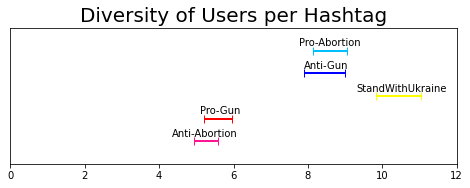

time: 2.57 s (started: 2022-08-05 11:38:21 +00:00)


In [ ]:
import matplotlib.pyplot as plt
y_dummy_dict = {'StandWithUkraine':3,'Pro-Gun':2,'Anti-Gun':4,'Pro-Abortion':5,'Anti-Abortion':1}
CIs['y_dummy']=CIs[group_column].map(y_dummy_dict)
plt.figure(figsize=(8,2.5))

plt.tick_params(left = False)
ax = plt.gca()
for i, txt in enumerate(CIs[group_column]):
    ax.errorbar(x=CIs['mean'][i]*100000, y = CIs['y_dummy'][i], xerr=(CIs['mean'][i]-CIs['LL'][i])*100000,markersize='4',capsize=4, elinewidth=2, yerr=None, fmt='o',color='none',ecolor=CIs['color'][i])#,markerfacecolor=CIs['color'],markeredgecolor=CIs['color'], color=CIs['color'])
    ax.annotate(txt, ((CIs['mean'][i]-0.0000007*len(txt))*100000, CIs['y_dummy'][i]+0.2),rotation=0)#,color=CIs['color'][i])
plt.ylim(-0.00,6)
plt.xlim(0,12)
ax.axes.yaxis.set_ticklabels([])
plt.title('Diversity of Users per Hashtag',fontsize=20)
plt.savefig(my_dir+"Charts/HashtagUsers_variance"+".png", bbox_inches = 'tight',format="png", dpi=650)